# L4. Discrete Joint distributions, covariance, correlation and depedendence

## L4.1 Join pmfs

Models often involve more than one variable. For example, measuring the distance travelled by someone in a day involves both time travelled and the travel velocity. Thus, we often need to consider probabilities of events involving simultaneously several random variables. We can still have pmfs in this situation and they are called the join probability mass functions. If we assume that we have two discrete random variables $X$ and $Y$ associated with the same experiment, then, the **joint pmf** is defined as the probability mass at $(x,y)$, i.e., 

$$p_{X,Y}(x,y) = P(X=x, Y=y)$$

where the comma indicates an intersection or an "and".

We then have as before:

$$P({X,Y} \in A) = \sum_{(x,y) \in A}{p_{X,Y}(x,y)}$$

We can even use this to estimate the **marginal** pmf of each random variable:

$$p_X(x) = \sum_y{p_{X,Y}(x,y)}$$

and the same for the pmf of $Y$. Unfortunately, we cannot go in the other direction - given the marginal pmfs, we cannot recover the full joint pmf (the dependency structure is missing).

### Exercise: Find the joint pmf of $X$ = outcome of a throw of a die and $Y$ = 1 if the outcome of the same die is even and 0 otherwise. Can you find the marginal pmf for Y?

The expected value works the same way

$$E[g(X,Y)] = \sum_x{\sum_y{g(x,y)p_{X,Y}(x,y)}}$$

and the expected value is still linear

$$E[aX + bY + c] = aE[X] + bE[Y] + c$$

In the previous exercise, E[X] = 3.5 and E[Y] = 0.5, so $E[X+Y] = E[X] + E[Y] = 4$ (even though they are dependent).

## L4.2 Conditioning

The values of random variables can also be conditioned on an event. The **conditional pmf** of a random variable $X$ conditioned on an event $A$ (with $P(A)>0$) is defined as

$$p_{X|A}(x) = P(X=x|A) = \frac{P(\{X=x\} \cap A)}{P(A)}$$

Let's find the pmf of $X$ in the previous exercise with the event $A$ = {the roll is even}.

We can also condition on another variable. It works in the same way

$$p_{X|Y}(x|y) = P(X=x|Y=y) = \frac{P(\{X=x\} \cap \{Y=y\})}{P(\{Y=y\})}$$

Our previous example covers $p_{X|Y}(x|1)$, but let's find $p_{X|Y}(x|0)$ to cover the full conditional $p_{X|Y}(x|y)$

The conditional pmf can be thought of as an ordinary pmf over a restricted universe (defined by the value of the second variable). In the same way, we can define the conditional expectation as an ordinary expectation, but now the probabilities are replaced with the corresponding conditional probabilities.

$$E[X|A] = \sum_x{xp_{X|A}(x)}$$

$$E[X|Y] = \sum_x{xp_{X|Y}(x|y)}$$

Let's find the expected number of heads in the first 4 tosses given that we got 7 heads in the first 10 tosses. This is like having an urn with 7 blue balls and 3 white balls. Define $X$ as the number of heads in first 4 tosses and $Y$ as the number of heads in first 10. We want to find E[X|Y=7]. We are picking 4 balls from the Urn, so we can find the probability of getting 0, 1, 2, 3, or 4 blue balls using the hypergeometric distribution. Recall that the hypergeometric is given by

$$\frac{\binom{m}{i}\binom{n-m}{k-i}}{\binom{n}{k}}$$

and here n=10, m=7, and k=4. i is then 0, 1,2,3 or 4.

In [1]:
#Monte Carlo of the example...
import numpy as np
import scipy.special

def hypergeometric(n,m,k,i):
    return scipy.special.binom(m,i)*scipy.special.binom(n-m,k-i)/scipy.special.binom(n,k)

pmf = []
for i in range(5):
    pmf.append(hypergeometric(10,7,4,i))
    
    
print("Actual distribution: ",pmf)
print("Theoretical answer: ", sum(np.array(pmf)*np.arange(0,5)))
    
#Monte Carlo

N = 1000 #Number of simulations, 100k is good

actual_sample = 0 #When we hit 7 heads out of 10
number_of_heads = 5*[0] #count for 0, 1,2,3,4 heads in first 4 tosses
for i in range(N):
    #Toss a coin ten times
    ten_tosses = np.random.choice(range(0, 2), size=10, replace=True)
    if sum(ten_tosses) == 7:
        actual_sample += 1
        number_of_heads[sum(ten_tosses[0:4])] += 1
        
print("Actual sample: ", actual_sample)
mc_pmf = [n/actual_sample for n in number_of_heads]
print("Monte Carlo distribution: ", mc_pmf)
print("Monte Carlo answer: ", sum(np.array(mc_pmf)*np.arange(0,5)))

Actual distribution:  [0.0, 0.03333333333333333, 0.3, 0.5, 0.16666666666666666]
Theoretical answer:  2.8
Actual sample:  104
Monte Carlo distribution:  [0.0, 0.04807692307692308, 0.34615384615384615, 0.46153846153846156, 0.14423076923076922]
Monte Carlo answer:  2.7019230769230766


Some further properties of conditional expectations:

If $A_1, ..., A_n$ is a disjoint partition of the sample space with $P(A_i)>0$, then

$$E[X] = \sum_{i=1}^n{P(A_i)E[X|A_i]}$$

So, similar to the total probability rule. This is sometimes useful to compute complicated $E[X]$.

Similarly, for conditioning on another variable, 

$$E[X] = \sum_{y}^n{p_Y(y)E[X|Y=y]}$$


## L4.3 Independence, 

Conditioning leads to dependence. If conditioning does not change the distribution of a random variable, then random variable is independent of the event that we are conditioning on. That is,

$$p_{X|A}(x) = p_X(x)$$

... the event has no impact on the probability of $X$ being $x$ (for all $x$).

### Exercise: Is the variable $X$ = number of heads from two independent tosses of a coin, and A be the event that the number of heads is even. Is $X$ independent from A?

Dependence between random variables is the same. Two random variables, $X$ and $Y$, are independent if

$$p_{X,Y}(x,y) = p_X(x)p_Y(y)$$

for all $x$ and $y$. This is just the same as $P(A \cap B) = P(A)P(B)$. If this is what independence means, then dependence means the opposite, i.e., this equality no longer holds and if $y$ changes, then that will have an effect on the probability of observing $x$. More generally, this means that $X$ is some function of $Y$ and potentially other things a well.

One of the nice benefits of independence of two random variables is the following rule:

$$E[XY] = E[X]E[Y]$$

and more generally,

$$E[g(X)h(Y)] = E[g(X)]E[h(Y)]$$ 


## L4.4 Covariance and correlation

The **covariance** of two random variables is defined as 

$$ \text{cov}(X,Y) = E[(X - EX)(Y-EY)] = E[XY] - E[X]E[Y]$$

Note that  $\text{cov}(X,X) = var(X)$. Intuitively, a positive covariance means that if $X$ is above its mean, then $Y$ tends to be above its mean and vise versa, and if $X$ is below its mean, then $Y$ tends to be below its mean. Thus, there is some kind of relationship between the variables in that they tend to vary together, or "covary". If they vary up and down independently, then the covariance is close to zero. In fact, we see from the previous section that if $X$ and $Y$ are independent, then their covariance is 0. The reverse is NOT true, a covariance of 0 does not necessarily imply independence.

When we have N data points [(x,y)] and want to estimate covariance, we use the following formula (assumes that all data points have the same probability = 1/N):

$$cov(X,Y) = \sum_i^N{\frac{(x_i-\bar{x})(y_i-\bar{y})}{N}} = \frac{1}{N}\sum_i^N{x_iy_i} - \frac{1}{N^2}\sum_i^N{x_i}\sum_i^N{y_i}$$

**Correlation** is closely related to covariance. In fact, it is more or less the same. just scaled:

$$\text{corr(X,Y)} = \frac{cov(X,Y)}{\sigma_X \sigma_Y}$$

A famous inequality (Cauchy-Schwarz) tells us the correlation can only be in the range of -1 to 1. Independent variables have 0 correlation. Perfectly linearly related variables have correlation of +1 if the linear relation is positive (positive coefficient, like Y = 2X) and -1 if there is a perfect negative linear relation (like Y = -2X).

Let´s do couple of examples.

Covariance (independent):  0.015251858686809103
Covariance (postive):  0.17121417565868566
Covariance (negative):  -0.17042356681728954


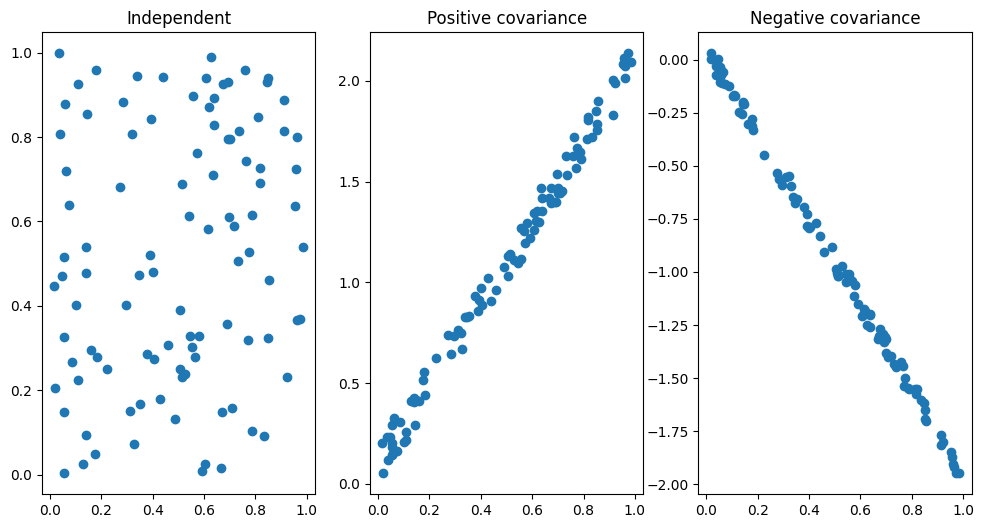

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, 
                                    figsize=(12, 6))

#Independence
N = 100
X = np.random.uniform(0,1, size=N)
Y = np.random.uniform(0,1, size=N)
C = np.cov(X,Y)[0,1] #Just get the covariance directly

print("Covariance (independent): ",C)
ax0.set_title('Independent')
ax0.plot(X,Y,'o')

#Positive dependence
Y = 2*X + 0.2*np.random.uniform(0,1, size=N)
C = np.cov(X,Y)[0,1]
print("Covariance (postive): ",C)
ax1.set_title('Positive covariance')
ax1.plot(X,Y,'o')

#Negative dependence
Y = -2*X + 0.1*np.random.uniform(0,1, size=N)
C = np.cov(X,Y)[0,1]
print("Covariance (negative): ",C)
ax2.set_title('Negative covariance')
ax2.plot(X,Y,'o')


Correlation measures linear dependence. The dependence can be non-linear, and then the correlation may be zero. Below is a famous example of when the data is highly dependent but their correlation is zero. Thus no correlation does not imply independence.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = np.random.uniform(-1,1,40)
y = np.sqrt(1-x*x)
X = list(x) + list(x)
Y = list(y) + list(-y)

#df = pd.DataFrame({'X':X, 'Y': Y})
print("Correlation between X and Y: ", np.corrcoef(X,Y)[0,1])

#df
#plt.figure(figsize = (7,7))
#plt.plot(X,Y,'o')

ModuleNotFoundError: No module named 'pandas'

Let's do an interesting example where two variables cause another variable. We will not discuss causality any further but it is one of the most interesting recent developments in probability theory, although it has not yet found its way into the mainstream textbooks.

Good references here are:

The book of Why by Pearl and MacKenzie

Behavioral data Analysis with R & Python

Here is one example from the Book of Why (and they take the example from somehwere else):

Where is my bag? Suppose you just landed back home after a long flight that made a connection in London (i.e., you landed there to change planes), and that you are waiting for your bag on the carousel in the bagging area. Other passengers are getting their bags but you are waiting and waiting for your bag. The question then arises on the probability that your bag didn't make the connection in London. Maybe you should just wait a little longer. What is the chance that the bag will be on the carousel at any given time? The answer is that it depends on two things. How long have you been waiting for the bag, and of course whether or not the bag was on the plane or not.

The idea is that there are two independent causes for the appearance of the bag on the belt (Z=1). First of all, it had to have been on the plane to begin with (X=1), and then it must come through the local system so that it becomes more and more likely to be on the belt as time passes (if was on the plane). Suppose for simplicity that all the bags have been loaded after 10 minutes, and that we are looking at Y=0, 1, ... , 10, that the bag is equally likely to arrive on the belt at any time, and that the probability of the bag missing the connecting flight is 50%. In order to solve the problem, we need to create a a conditional probability table:

<table>
    <tr>
        <th>X</th><th>Y</th><th>P(Z=0|X,Y)</th><th>P(Z=1|X,Y)</th>
    </tr>
        <tr><td>0</td><td>0</td><td>1</td><td>0</td></tr>
        <tr><td>0</td><td>1</td><td>1</td><td>0</td></tr>
        <tr><td>0</td><td>2</td><td>1</td><td>0</td></tr>
        <tr><td>0</td><td>3</td><td>1</td><td>0</td></tr>
        <tr><td>0</td><td>4</td><td>1</td><td>0</td></tr>
        <tr><td>0</td><td>5</td><td>1</td><td>0</td></tr>
        <tr><td>0</td><td>6</td><td>1</td><td>0</td></tr>
        <tr><td>0</td><td>7</td><td>1</td><td>0</td></tr>
        <tr><td>0</td><td>8</td><td>1</td><td>0</td></tr>
        <tr><td>0</td><td>9</td><td>1</td><td>0</td></tr>
        <tr><td>0</td><td>10</td><td>1</td><td>0</td></tr>
        <tr><td>1</td><td>0</td><td>1</td><td>0</td></tr>
        <tr><td>1</td><td>1</td><td>0.9</td><td>0.1</td></tr>
        <tr><td>1</td><td>2</td><td>0.8</td><td>0.2</td></tr>
        <tr><td>1</td><td>3</td><td>0.7</td><td>0.3</td></tr>
        <tr><td>1</td><td>4</td><td>0.6</td><td>0.4</td></tr>
        <tr><td>1</td><td>5</td><td>0.5</td><td>0.5</td></tr>
        <tr><td>1</td><td>6</td><td>0.4</td><td>0.6</td></tr>
        <tr><td>1</td><td>7</td><td>0.3</td><td>0.7</td></tr>
        <tr><td>1</td><td>8</td><td>0.2</td><td>0.8</td></tr>
        <tr><td>1</td><td>9</td><td>0.1</td><td>0.9</td></tr>
        <tr><td>1</td><td>10</td><td>0</td><td>1</td></tr>
</table>        
            
The table gives us the depedency structure between the variables and all the information we need to answer the original question.
            
The problem is to find the probability that the bag will arrive on the carousel: 
            
$P(X=1|Y = y, Z_i=0)$ for i = 0, 1, .., y.

We know that $P(X=1|Y=0) = 0.5$. However,
 
$$P(X=1|Y= 1,Z_1=0) = \frac{P(X=1,Y=1,Z_0=0,Z_1=0)}{P(Y=1,Z_0=0,,Z_1=0)} 
= \frac{P(X=1)P(Y=1,Z_0=0,Z_1=0|X=1)}{P(Y=1,Z_0=0,Z_1=0|X=0)P(X=0)+P(Y=1,Z_0=0,Z_1=0|X=1)P(X=1)} 
= \frac{0.5*0.9}{1*0.5+0.9*0.5} = 47\%$$
            
In general,

$$P(X=1|Y=i,Z_0=0,Z_1=0, ..., Z_{y}=0) = \frac{P(X=1,Y=y,Z_0=0,Z_1=0, ..., Z_{y}=0)}{P(Y=i,Z_0=0,Z_1=0, ..., Z_{y}=0)} = \frac{P(X=1)P(Y=i,Z_0=0,Z_1=0, ..., Z_{y}=0|X=1)}{P(Y=i,Z_0=0,Z_1=0, ..., Z_{y}=0|X=0)P(X=0)+P(Y=i,Z_0=0,Z_1=0, ..., Z_{y}=0|X=1)P(X=1)} = \frac{0.5*i/10}{1*0.5+i/10*0.5} $$

,y,p
0,0,0.500000
1,1,0.473684
2,2,0.444444
3,3,0.411765
4,4,0.375000
5,5,0.333333
6,6,0.285714
7,7,0.230769
8,8,0.166667
9,9,0.090909


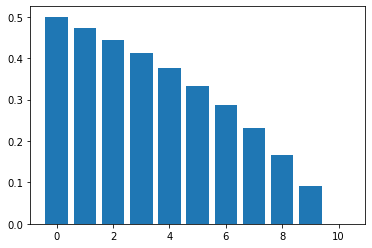

In [ ]:
#Let's take a look at the probabilities:
y = list(range(0,11))
p = [0.5*i/10/(0.5+0.5*i/10) for i in range(10,-1,-1)]
plt.bar(y,p)
pd.DataFrame({"y":y,"p":p}) #Just to display in nice table format

In [ ]:
#And, let's see if we can generate it using Monte Carlo
#Involves a bit of data wrangling...

import numpy as np
import pandas as pd

N = 10000 #Number of scenarios
res = [] #A list of dicts that will be put into a dataframe


for i in range(N):
    #First, pick an X
    x = np.random.choice([0,1])
    
    #Base scenario, modify if x=1
    scenario = {"x":0,
                "z1":0,"z2":0,"z3":0,"z4":0,"z5":0,
                "z6":0,"z7":0,"z8":0,"z9":0,"z10":0}
    
    if x == 1:
        #Then, pick a y - when the bag appears
        y = np.random.choice([1,2,3,4,5,6,7,8,9,10])
        scenario["x"] = 1
        scenario["z"+str(y)] = 1

    res.append(scenario)
    
df = pd.DataFrame(res)

In [ ]:
df.head(10)

,x,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10
0,1,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0


[0.5,
 0.4775411218894981,
 0.45236516357206014,
 0.4184954817509682,
 0.38362980470207736,
 0.34248938428874737,
 0.28970756880733944,
 0.23320953265242958,
 0.1680658159838818,
 0.08898694612980328,
 0.0]

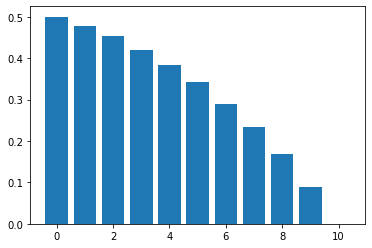

In [ ]:
#Now, compute the probabilities
p = [0.5] #=P(X=1|Y=y), y is the index

for y in range(1,11):
    temp = df
    for i in range(1,y+1):
        temp = temp.loc[temp["z"+str(i)] == 0,:]
    Ny = len(temp) #All possible scenarios
    Ns = len(temp[temp["x"]==1]) #All where the bag arrives
    p.append(Ns/Ny)
    
plt.bar(list(range(0,11)),p)
p

As you wait longer and longer, things start to look worse...

## Homework

### Joint pmfs

1. Suppose we draw 2 balls out of an urn with 8 red, 6 blue and 4 green balls. Let $X$ be the number of red balls we get and $Y$ be the number of blue balls. (a) Find the joint distribution of $X$ and $Y$. (b) Find the marginal distribution of $X$.

2. Suppose $P(X=x,Y=y) = c(x+y)$ for $x,y = 0,1,2,3$. (a) Which value of $c$ makes this a probability mass function? (b) Find $P(X>Y)$.

### Conditional Expectation
3. Suppose we roll a die to get a number and then flip a coin that number of times. Find the expected number of Heads.

### Covariance and Correlation
4. Suppose $X$ takes on the values -2, -1, 0, 1, 2 with probability 0.2 each. Let $Y=X^2$. (a) Find COV(X,Y), (b) CORR(X,Y), (c) Are X and Y independent?

In [38]:
N = 1000000
d1 = np.random.choice(range(1, 7), size=N, replace=True) 
num_heads = 0
for i in range(len(d1)):
    coin = np.random.choice(range(0, 2), size=d1[i], replace=True) 
    num_heads += np.count_nonzero(coin)

print(f"Expected number of heads = {num_heads/N}")
    

Expected number of heads = 1.747863
